## <center> Gradient Descent Algorithm

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
data = pd.read_csv('data/admission.csv', names=['grade1','grade2', 'remark'])
data.head(10)

,grade1,grade2,remark
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


In [14]:
data.shape

(100, 3)

In [15]:
def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(w, b, color='g--'):
    x = np.arange(-10, 10, 0.1)
    y = w*x + b
    plt.plot(x, y, color)

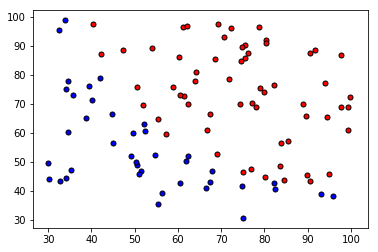

In [16]:
X = np.array(data[['grade1', 'grade2']])
y = np.array(data['remark'])

plot_points(X, y)

1. The *sigmoid activation* function: `sigmoid`;
2. The formula for the *prediction*: `predict`;
3. The formula for the *error* at a point: `log_loss`;
4. The function that *updates the parameters* with one gradient descent step: `update_weights`.

#### Basic functions

These are the formulas we'll need to implement.

1. Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

2. Prediction formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

3. Error (log_loss) function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

4. The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [17]:
# sigmoid convert scores into probability values
def sigmoid(x):
    return 1/ ( 1 + np.exp(-x) )

def predict(features, weights, bias):
    return sigmoid(np.matmul(features,weights) + bias)

def log_loss(y, output):
    return -y*np.log(output) - (1- y)*np.log(1-output)

# Gradient descent step
def update_weights(x, y, weights, bias, lr):
    output = predict(x, weights, bias)
    d_error = y - output
    weights += lr * d_error * x
    bias += lr * d_error
    return weights, bias

In [41]:
def equation(w1, w2, b):
    return w1*0.5 + w2*0.8 + b

In [43]:
# get probablities
sigmoid(equation(2,6,-2)), sigmoid(equation(3,5,-2.2)), sigmoid(equation(5,4,-3))

(0.9781187290638694, 0.9644288107273639, 0.9370266439430035)

In [20]:
n_records, n_features = X.shape
np.random.normal(scale=1 / n_features**.5, size=n_features)

array([ 0.88115406, -1.1348468 ])

In [47]:
np.random.seed(44)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    # the error for each epoch
    errors = []
    
    # the number of records and the number of features
    n_records, n_features = features.shape
    last_loss = None
    
    # start with random weights
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    print('Initial Random Weights: ', weights[0], weights[1])
    
    # start with a bias of 0
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            # calculate the output
            output = predict(x, weights, bias)
            
            # calculate the error
            error = log_loss(y, output)
            
            # update the weights and bias
            weights, bias = update_weights(x, y, weights, bias, learnrate)
            
        # printing out the log-loss error on the training set
        out = predict(features, weights, bias)
        loss = np.mean(log_loss(targets, out))
        errors.append(loss)
        
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss && last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

SyntaxError: invalid syntax (<ipython-input-47-bb7e74f7dbf9>, line 40)

Initial Random Weights:  0.881154064561768 -1.1348468038769866

========== Epoch 0 ==========
Train loss:  nan
Accuracy:  0.6

========== Epoch 10 ==========
Train loss:  nan
Accuracy:  0.6

========== Epoch 20 ==========
Train loss:  nan
Accuracy:  0.6


/home/shebogholo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/shebogholo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':



========== Epoch 30 ==========
Train loss:  nan
Accuracy:  0.6

========== Epoch 40 ==========
Train loss:  nan
Accuracy:  0.6

========== Epoch 50 ==========
Train loss:  nan
Accuracy:  0.6

========== Epoch 60 ==========
Train loss:  nan
Accuracy:  0.6

========== Epoch 70 ==========
Train loss:  nan
Accuracy:  0.6

========== Epoch 80 ==========
Train loss:  nan
Accuracy:  0.6

========== Epoch 90 ==========
Train loss:  nan
Accuracy:  0.6


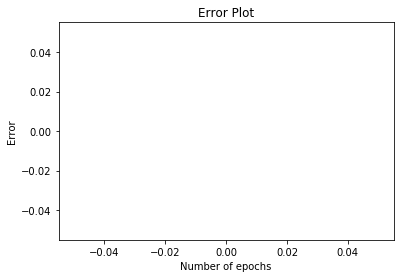

In [48]:
train(X, y, epochs, learnrate, True)